# Importing libraries

In [4]:
import pandas as pd;                        # allows importing data from various file formats & data manipulation operations

import numpy as np;                         # provides support for multi-dimensional arrays.

import numba as nb;                         # just-in-time compiler for Python

import seaborn as sbn;                      # used for making statistical graphics & data viszltion lib built on top of matplotlib

import matplotlib.pyplot as plt;            # creates a figure,creates plotting area in a figure,plots lines in a plotting area

# Displays output inline
%matplotlib inline       

import warnings;
# Never display warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading Dataset using pandas library
data = pd.read_csv('Students_dataset.csv')

In [6]:
#display first 15 rows from the dataset
data.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [7]:
#shows no of rows , columns  in dataset
data.shape

(1000, 8)

In [8]:
# replacing space with underscore for easy access of columns
data.columns = data.columns.str.replace(' ','_')

In [9]:
# displays columns names
data.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [10]:
# check for null values
# isna() is used to detect missing values
data.isna().sum()        # returns the number of missing values in each columns

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# Plotting with Single Feature

<AxesSubplot:xlabel='gender', ylabel='count'>

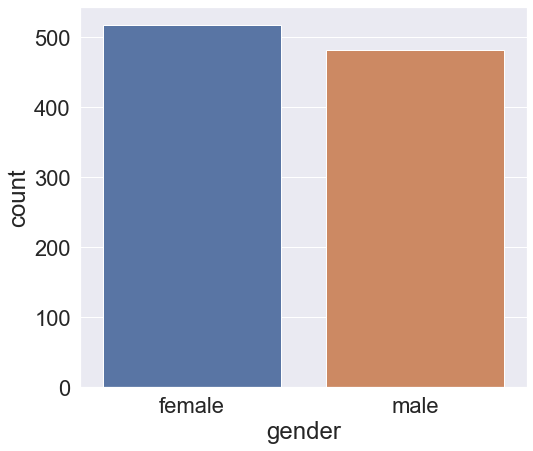

In [11]:
#setting up fontsize,plotsize, etc..
sbn.set(font_scale=2)
plt.figure(figsize=(8,7))
sbn.countplot(x='gender',data=data)

The dataset contains more no of female than male 